# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.stats import linregress
from statsmodels.tsa.arima.model import ARIMA
from pymannkendall import original_test as mk_test
import plotly
%matplotlib inline

C:\Users\Fede\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
constructors=pd.read_csv("/Users/Fede/Documents/R/Data Science KCL/Simulation and Data Visualitation/Formula1/constructors.csv")
constructors

constructorId constructorRef            name nationality  \
0                1        mclaren         McLaren     British   
1                2     bmw_sauber      BMW Sauber      German   
2                3       williams        Williams     British   
3                4        renault         Renault      French   
4                5     toro_rosso      Toro Rosso     Italian   
..             ...            ...             ...         ...   
206            209          manor  Manor Marussia     British   
207            210           haas    Haas F1 Team    American   
208            211   racing_point    Racing Point     British   
209            213     alphatauri      AlphaTauri     Italian   
210            214         alpine  Alpine F1 Team      French   

                                                   url  
0                 http://en.wikipedia.org/wiki/McLaren  
1              http://en.wikipedia.org/wiki/BMW_Sauber  
2    http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3    http://en.wikipedia.org/wiki/Renault_in_Formul...  
4     http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso  
..                                                 ...  
206      http://en.wikipedia.org/wiki/Manor_Motorsport  
207          http://en.wikipedia.org/wiki/Haas_F1_Team  
208  http://en.wikipedia.org/wiki/Racing_Point_F1_Team  
209   http://en.wikipedia.org/wiki/Scuderia_AlphaTauri  
210        http://en.wikipedia.org/wiki/Alpine_F1_Team  

[211 rows x 5 columns]

In [3]:
drivers=pd.read_csv("/Users/Fede/Documents/R/Data Science KCL/Simulation and Data Visualitation/Formula1/drivers.csv")
drivers

driverId        driverRef number code  forename     surname         dob  \
0           1         hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1           2         heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2           3          rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3           4           alonso     14  ALO  Fernando      Alonso  1981-07-29   
4           5       kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   
..        ...              ...    ...  ...       ...         ...         ...   
852       854  mick_schumacher     47  MSC      Mick  Schumacher  1999-03-22   
853       855             zhou     24  ZHO    Guanyu        Zhou  1999-05-30   
854       856         de_vries     45  DEV      Nyck    de Vries  1995-02-06   
855       857          piastri     81  PIA     Oscar     Piastri  2001-04-06   
856       858         sargeant      2  SAR     Logan    Sargeant  2000-12-31   

    nationality                                             url  
0       British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1        German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2        German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3       Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4       Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  
..          ...                                             ...  
852      German    http://en.wikipedia.org/wiki/Mick_Schumacher  
853     Chinese        http://en.wikipedia.org/wiki/Guanyu_Zhou  
854       Dutch      http://en.wikipedia.org/wiki/Nyck_de_Vries  
855  Australian      http://en.wikipedia.org/wiki/Oscar_Piastri  
856    American     http://en.wikipedia.org/wiki/Logan_Sargeant  

[857 rows x 9 columns]

In [4]:
status = pd.read_csv("/Users/Fede/Documents/R/Data Science KCL/Simulation and Data Visualitation/Formula1/status.csv")
status

statusId          status
0           1        Finished
1           2    Disqualified
2           3        Accident
3           4       Collision
4           5          Engine
..        ...             ...
134       137          Damage
135       138          Debris
136       139         Illness
137       140       Undertray
138       141  Cooling system

[139 rows x 2 columns]

In [5]:
results = pd.read_csv("/Users/Fede/Documents/R/Data Science KCL/Simulation and Data Visualitation/Formula1/results.csv")
results

resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
25835     25841    1096       854            210     47    12       16   
25836     25842    1096       825            210     20    16       17   
25837     25843    1096         1            131     44     5       18   
25838     25844    1096       849              3      6    20       19   
25839     25845    1096         4            214     14    10       \N   

      positionText  positionOrder  points  laps         time milliseconds  \
0                1              1    10.0    58  1:34:50.616      5690616   
1                2              2     8.0    58       +5.478      5696094   
2                3              3     6.0    58       +8.163      5698779   
3                4              4     5.0    58      +17.181      5707797   
4                5              5     4.0    58      +18.014      5708630   
...            ...            ...     ...   ...          ...          ...   
25835           16             16     0.0    57           \N           \N   
25836           17             17     0.0    57           \N           \N   
25837           18             18     0.0    55           \N           \N   
25838           19             19     0.0    55           \N           \N   
25839            R             20     0.0    27           \N           \N   

      fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0             39    2       1:27.452         218.300         1  
1             41    3       1:27.739         217.586         1  
2             41    5       1:28.090         216.719         1  
3             58    7       1:28.603         215.464         1  
4             43    1       1:27.418         218.385         1  
...          ...  ...            ...             ...       ...  
25835         39   12       1:29.833         211.632        11  
25836         40   20       1:31.158         208.556        11  
25837         42   11       1:29.788         211.738         9  
25838         45   14       1:30.309         210.517       130  
25839         24   17       1:30.579         209.889        47  

[25840 rows x 18 columns]

In [6]:
races =  pd.read_csv("/Users/Fede/Documents/R/Data Science KCL/Simulation and Data Visualitation/Formula1/races.csv")
races

raceId  year  round  circuitId                      name        date  \
0          1  2009      1          1     Australian Grand Prix  2009-03-29   
1          2  2009      2          2      Malaysian Grand Prix  2009-04-05   
2          3  2009      3         17        Chinese Grand Prix  2009-04-19   
3          4  2009      4          3        Bahrain Grand Prix  2009-04-26   
4          5  2009      5          4        Spanish Grand Prix  2009-05-10   
...      ...   ...    ...        ...                       ...         ...   
1097    1116  2023     19         69  United States Grand Prix  2023-10-22   
1098    1117  2023     20         32    Mexico City Grand Prix  2023-10-29   
1099    1118  2023     21         18      São Paulo Grand Prix  2023-11-05   
1100    1119  2023     22         80      Las Vegas Grand Prix  2023-11-19   
1101    1120  2023     23         24      Abu Dhabi Grand Prix  2023-11-26   

          time                                                url    fp1_date  \
0     06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...          \N   
1     09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...          \N   
2     07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...          \N   
3     12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...          \N   
4     12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...          \N   
...        ...                                                ...         ...   
1097  19:00:00  https://en.wikipedia.org/wiki/2023_United_Stat...  2023-10-20   
1098  20:00:00  https://en.wikipedia.org/wiki/2023_Mexico_City...  2023-10-27   
1099  17:00:00  https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...  2023-11-03   
1100  06:00:00  https://en.wikipedia.org/wiki/2023_Las_Vegas_G...  2023-11-17   
1101  13:00:00  https://en.wikipedia.org/wiki/2023_Abu_Dhabi_G...  2023-11-24   

      fp1_time    fp2_date  fp2_time    fp3_date  fp3_time  quali_date  \
0           \N          \N        \N          \N        \N          \N   
1           \N          \N        \N          \N        \N          \N   
2           \N          \N        \N          \N        \N          \N   
3           \N          \N        \N          \N        \N          \N   
4           \N          \N        \N          \N        \N          \N   
...        ...         ...       ...         ...       ...         ...   
1097  17:30:00  2023-10-21  18:00:00          \N        \N  2023-10-20   
1098  18:30:00  2023-10-27  22:00:00  2023-10-28  17:30:00  2023-10-28   
1099  14:30:00  2023-11-04  14:30:00          \N        \N  2023-11-03   
1100  04:30:00  2023-11-17  08:00:00  2023-11-18  04:30:00  2023-11-18   
1101  09:30:00  2023-11-24  13:00:00  2023-11-25  10:30:00  2023-11-25   

     quali_time sprint_date sprint_time  
0            \N          \N          \N  
1            \N          \N          \N  
2            \N          \N          \N  
3            \N          \N          \N  
4            \N          \N          \N  
...         ...         ...         ...  
1097   21:00:00  2023-10-21    22:00:00  
1098   21:00:00          \N          \N  
1099   18:00:00  2023-11-04    18:30:00  
1100   08:00:00          \N          \N  
1101   14:00:00          \N          \N  

[1102 rows x 18 columns]

In [7]:
constructor_results = pd.read_csv(
    "/Users/Fede/Documents/R/Data Science KCL/Simulation and Data Visualitation/Formula1/constructor_results.csv"
)
constructor_results

constructorResultsId  raceId  constructorId  points status
0                         1      18              1    14.0     \N
1                         2      18              2     8.0     \N
2                         3      18              3     9.0     \N
3                         4      18              4     5.0     \N
4                         5      18              5     2.0     \N
...                     ...     ...            ...     ...    ...
12165                 16665    1096            117     5.0     \N
12166                 16666    1096            213     0.0     \N
12167                 16667    1096             51     0.0     \N
12168                 16668    1096              3     0.0     \N
12169                 16669    1096            210     0.0     \N

[12170 rows x 5 columns]

In [8]:
results_of_teams = races.merge(constructor_results, on='raceId', how='inner')
results_of_teams = results_of_teams.merge(constructors, on="constructorId", how="inner")

In [9]:
results_of_teams.drop(
    columns=
    [
        'time','fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date',"url_x","url_y","constructorResultsId",
        'fp3_time','quali_date', 'quali_time', 'sprint_date', 'sprint_time',"status","name_y","constructorId"
    ]
    , 
    inplace=True
)

In [10]:
 results_of_teams['constructorRef'].replace(
     {'renault': 'alpine', "lotus_f1":"alpine",'toro_rosso': 'alpha_tauri', 'force_india': 'aston_martin',"alphatauri":"alpha_tauri",
      'racing_point': 'aston_martin','aston martin': 'aston_martin', "sauber":"alfa"}, 
     inplace = True
    )

# Q1

In [11]:
# To use average because the number of races was lower on previous years
season_points = results_of_teams[results_of_teams['year'] >= 2010].groupby(['year','constructorRef'])['points'].mean()
season_points = season_points.reset_index()
season_points["constructorRef"].unique()
#len(season_points["constructorRef"].unique())

array(['alfa', 'alpha_tauri', 'alpine', 'aston_martin', 'ferrari', 'hrt',
       'lotus_racing', 'mclaren', 'mercedes', 'red_bull', 'virgin',
       'williams', 'caterham', 'marussia', 'manor', 'haas'], dtype=object)

In [12]:
season_points["constructorRef"].unique()

array(['alfa', 'alpha_tauri', 'alpine', 'aston_martin', 'ferrari', 'hrt',
       'lotus_racing', 'mclaren', 'mercedes', 'red_bull', 'virgin',
       'williams', 'caterham', 'marussia', 'manor', 'haas'], dtype=object)

In [13]:
# Count the number of occurrences of each constructorRef
counts = season_points['constructorRef'].value_counts()
counts
# Get the constructorRef values that appear in more than 4 years
mask = counts[counts > 4].index
## Subset the results_of_teams dataframe based on the mask
subset = season_points[season_points['constructorRef'].isin(mask)]
subset["constructorRef"].unique()

array(['alfa', 'alpha_tauri', 'alpine', 'aston_martin', 'ferrari',
       'mclaren', 'mercedes', 'red_bull', 'williams', 'haas'],
      dtype=object)

## Plot used for visualitation 2

In [14]:
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

# Create a pivot table with the points as values
pivot_table = pd.pivot_table(subset, values='points', index='year', columns='constructorRef')

# Define the color scheme
colors = {
    'alfa': '#FF5733',
    'alpha_tauri': '#C70039',
    'red_bull': '#900C3F',
    'aston_martin': '#581845',
    'ferrari': '#00A0DE',
    'mclaren': '#1B4F72',
    'haas': '#154360',
    'alpine': '#F1C40F',
    'williams': '#27AE60',
    'mercedes': '#8E44AD',
}

# Plot the pivot table as a line plot using Plotly
fig = go.Figure()

for team in pivot_table.columns:
    fig.add_trace(go.Scatter(x=pivot_table.index, y=pivot_table[team], mode='lines+markers', name=team, marker_color=colors[team]))

fig.update_layout(
    title='Average Points per Year and Team',
    xaxis_title='Year',
    xaxis=dict(range=[2010, 2023]),
    yaxis_title='Points',
)

fig.show()

In [15]:
team_data = {}
for team in subset['constructorRef'].unique():
    team_data[team] = subset[subset['constructorRef'] == team].reset_index(drop=True)
team_data

{'alfa':     year constructorRef    points
 0   2010           alfa  2.315789
 1   2011           alfa  2.315789
 2   2012           alfa  6.300000
 3   2013           alfa  3.000000
 4   2014           alfa  0.000000
 5   2015           alfa  1.894737
 6   2016           alfa  0.095238
 7   2017           alfa  0.250000
 8   2018           alfa  2.285714
 9   2019           alfa  2.714286
 10  2020           alfa  0.470588
 11  2021           alfa  0.590909
 12  2022           alfa  2.500000,
 'alpha_tauri':     year constructorRef    points
 0   2010    alpha_tauri  0.684211
 1   2011    alpha_tauri  2.157895
 2   2012    alpha_tauri  1.300000
 3   2013    alpha_tauri  1.736842
 4   2014    alpha_tauri  1.578947
 5   2015    alpha_tauri  3.526316
 6   2016    alpha_tauri  3.000000
 7   2017    alpha_tauri  2.650000
 8   2018    alpha_tauri  1.571429
 9   2019    alpha_tauri  4.047619
 10  2020    alpha_tauri  6.294118
 11  2021    alpha_tauri  6.454545
 12  2022    alpha_tauri  1.590

In [16]:
# Compute the slope of the trend using Sen's estimator
def sen_slope(data):
    n = len(data)
    slopes = []
    for i in range(n):
        for j in range(i+1, n):
            slopes.append((data[j]-data[i])/(j-i))
    return np.median(slopes)

Sen's slope estimator: -0.05158730158730157
Mann-Kendall test p-value: 0.7138155970494986
alfa: data is stationary after 0 differencing steps
ADF p-value of alfa: 0.035693


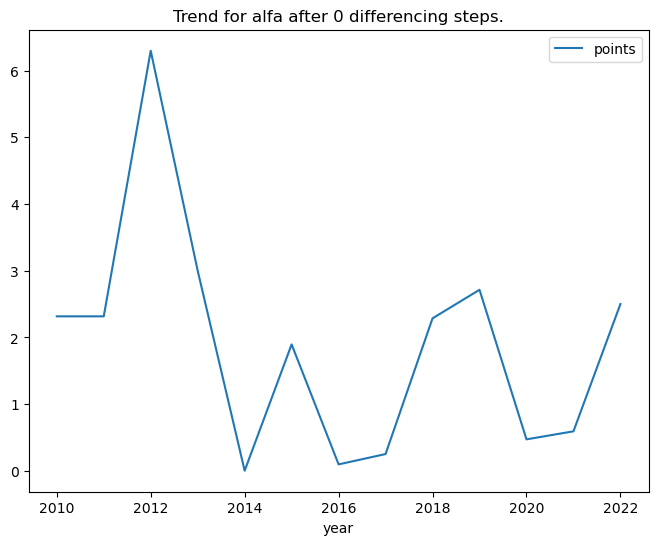

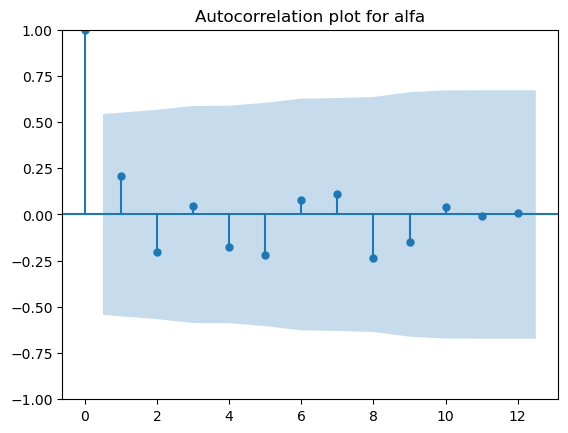

C:\Users\Fede\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



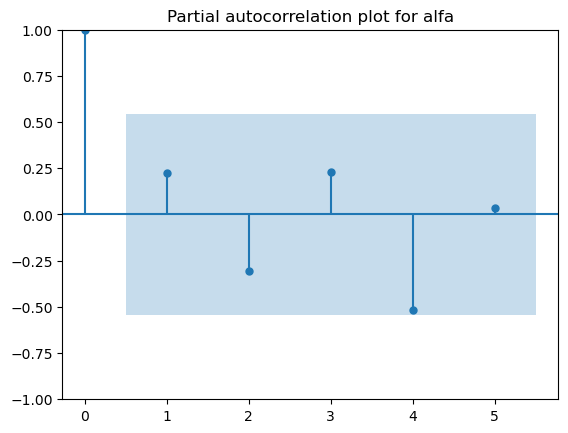

Sen's slope estimator: 0.3456558061821219
Mann-Kendall test p-value: 0.03273560958832067
alpha_tauri: data is stationary after 2 differencing steps
ADF p-value of alpha_tauri: 0.000000


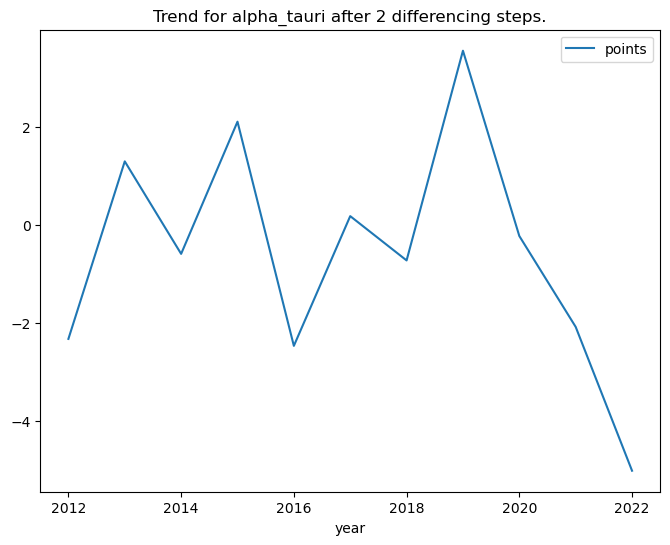

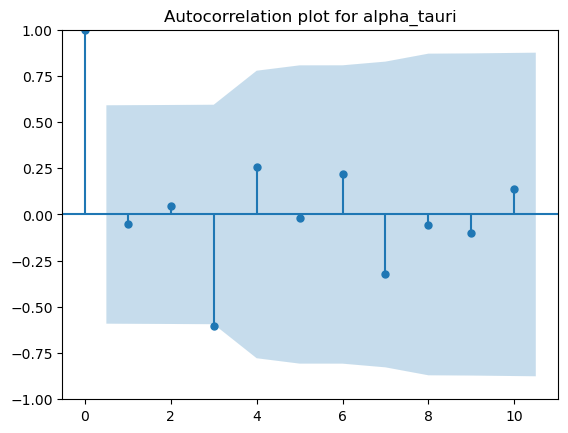

C:\Users\Fede\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



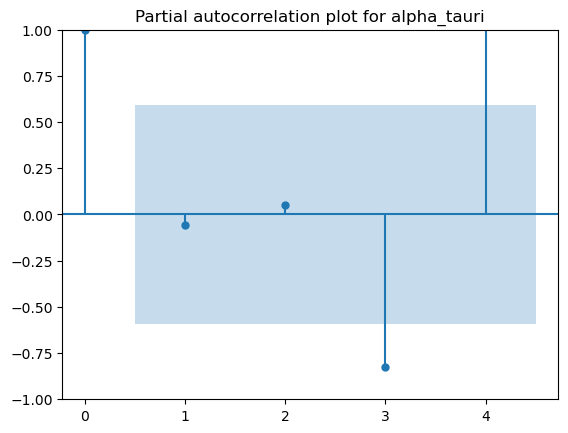

Sen's slope estimator: 0.1363003095975232
Mann-Kendall test p-value: 0.760332307521876
alpine: data is stationary after 0 differencing steps
ADF p-value of alpine: 0.000012


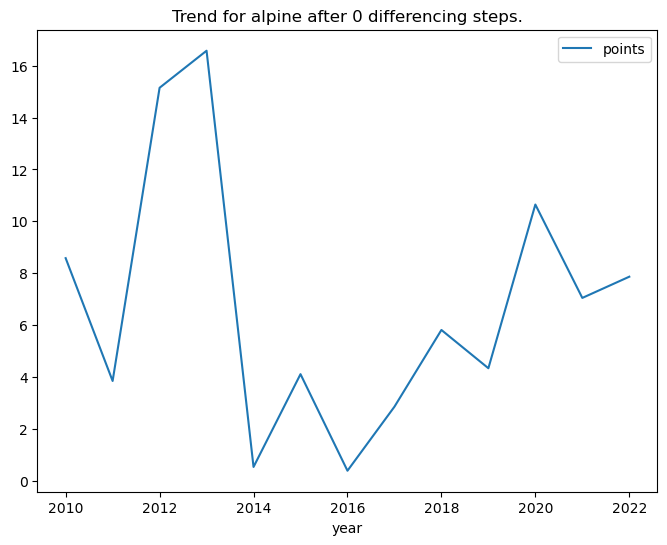

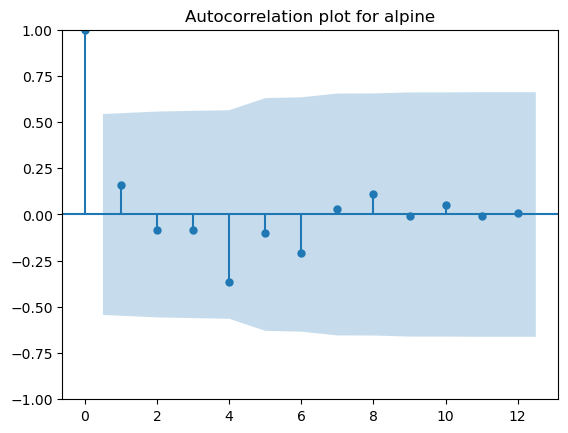

C:\Users\Fede\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



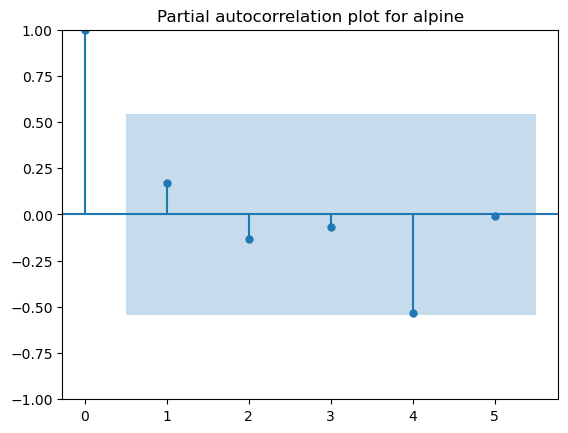

Sen's slope estimator: 0.026002506265664138
Mann-Kendall test p-value: 0.9513521309544037
aston_martin: data is stationary after 1 differencing steps
ADF p-value of aston_martin: 0.000114


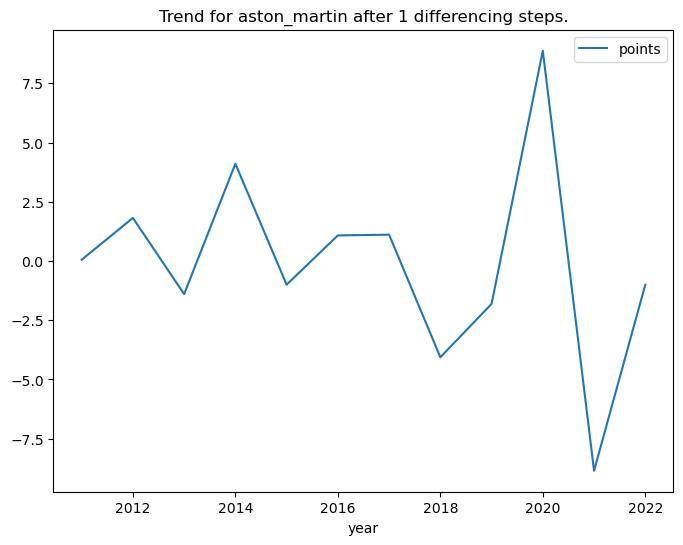

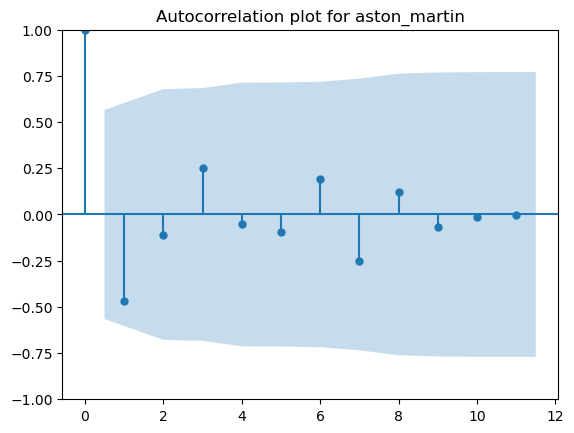

C:\Users\Fede\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



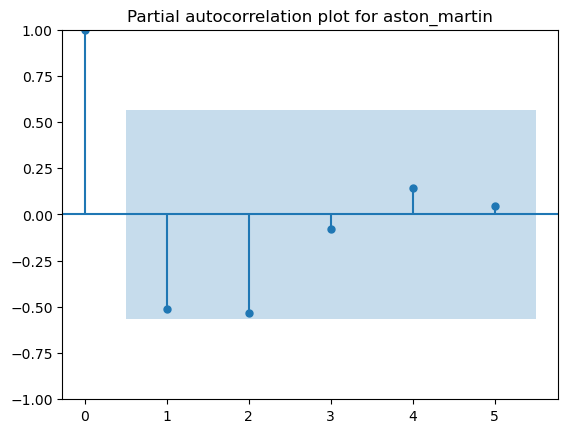

Sen's slope estimator: 0.3438596491228072
Mann-Kendall test p-value: 0.760332307521876
ferrari: data is stationary after 2 differencing steps
ADF p-value of ferrari: 0.000031


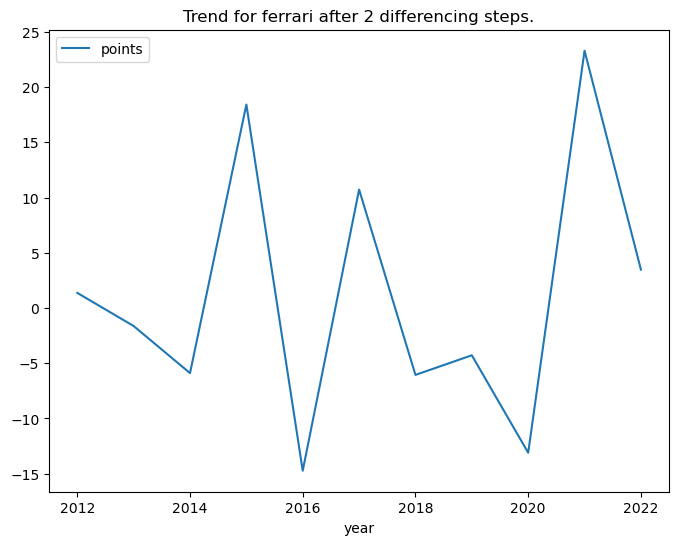

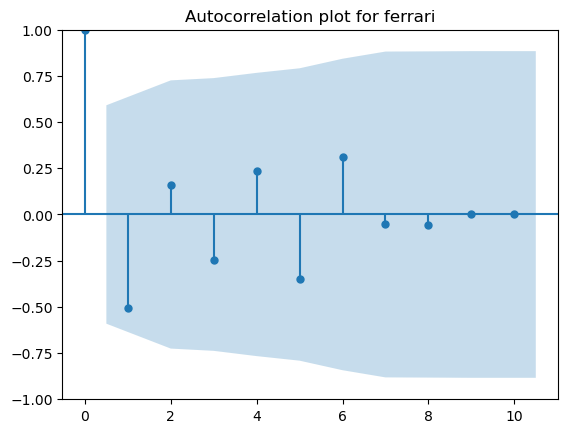

C:\Users\Fede\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



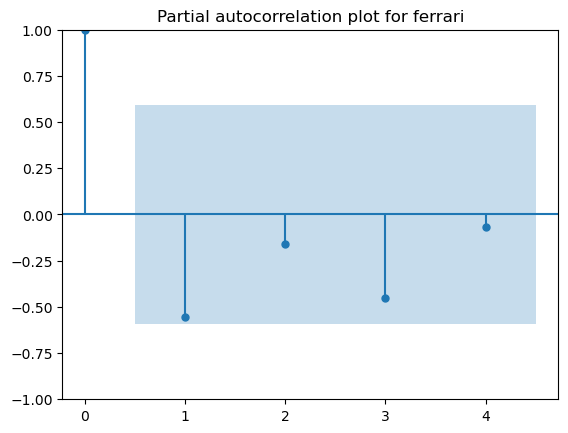

Sen's slope estimator: -0.9849434191539457
Mann-Kendall test p-value: 0.4277105102974643
mclaren: data is stationary after 1 differencing steps
ADF p-value of mclaren: 0.000000


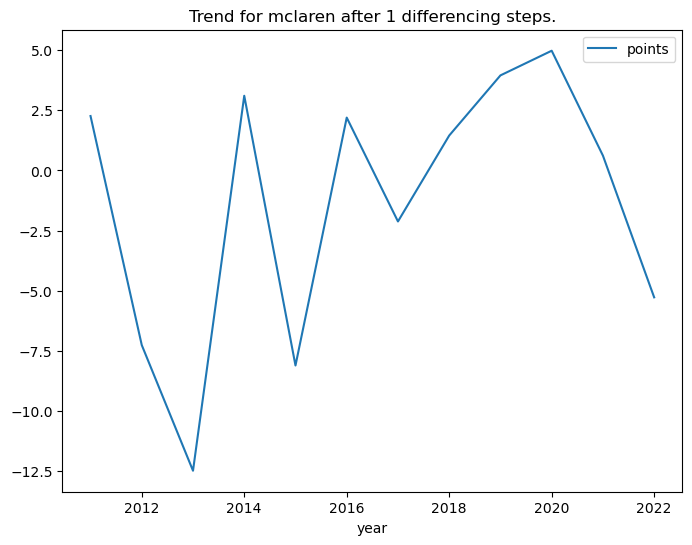

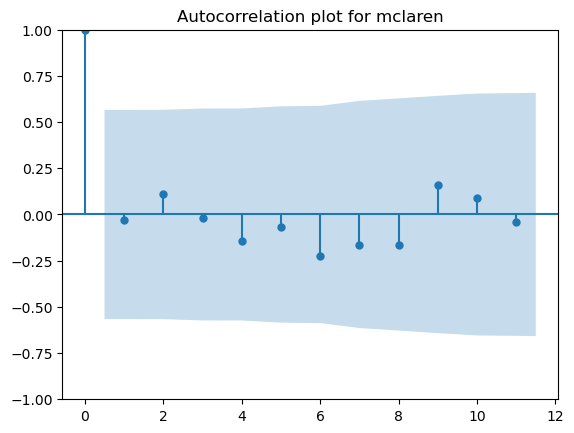

C:\Users\Fede\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



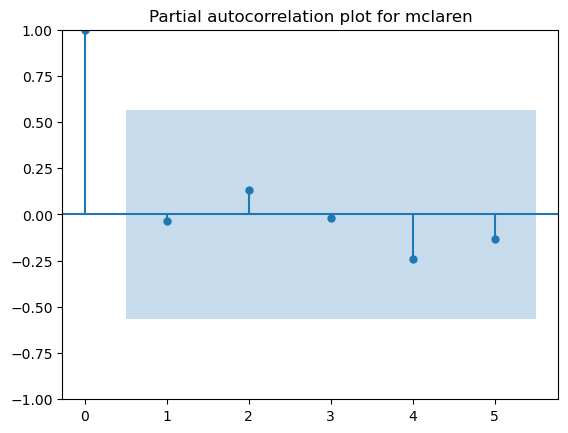

Sen's slope estimator: 1.0647677432216907
Mann-Kendall test p-value: 0.5829505577618919
mercedes: data is stationary after 2 differencing steps
ADF p-value of mercedes: 0.000000


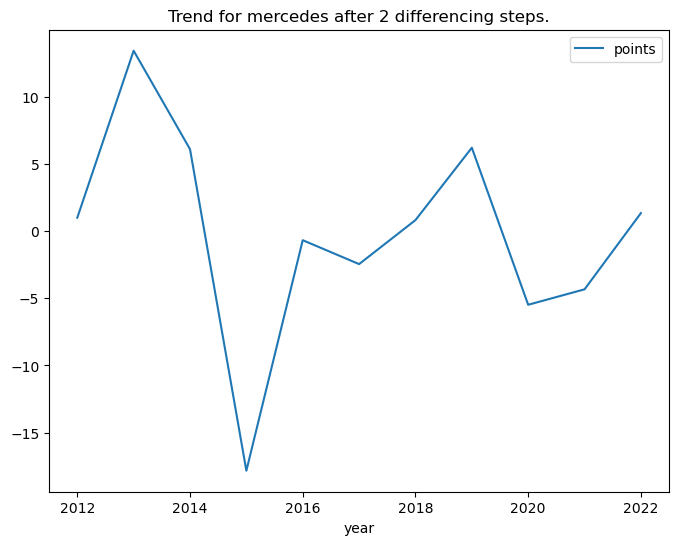

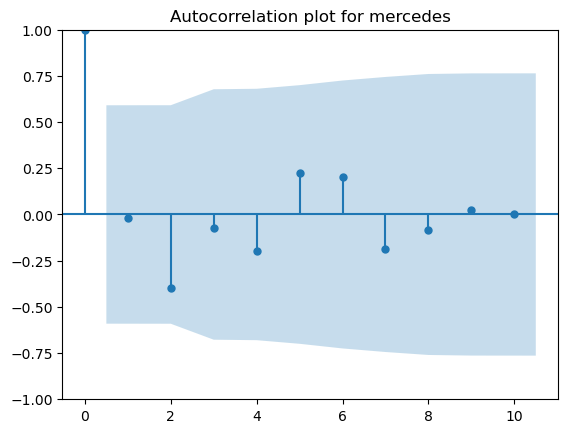

C:\Users\Fede\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



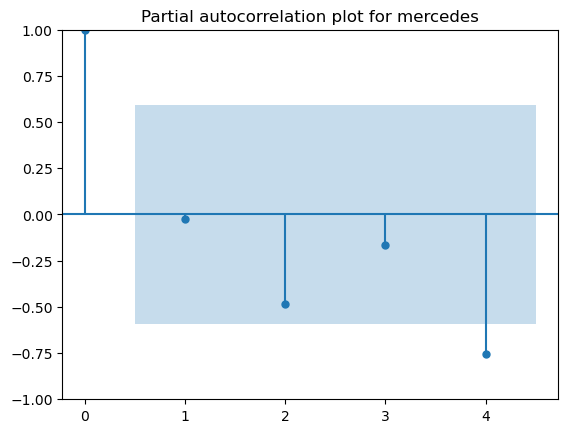

Sen's slope estimator: -0.4784580498866213
Mann-Kendall test p-value: 0.5021582515007486
red_bull: data is stationary after 1 differencing steps
ADF p-value of red_bull: 0.000114


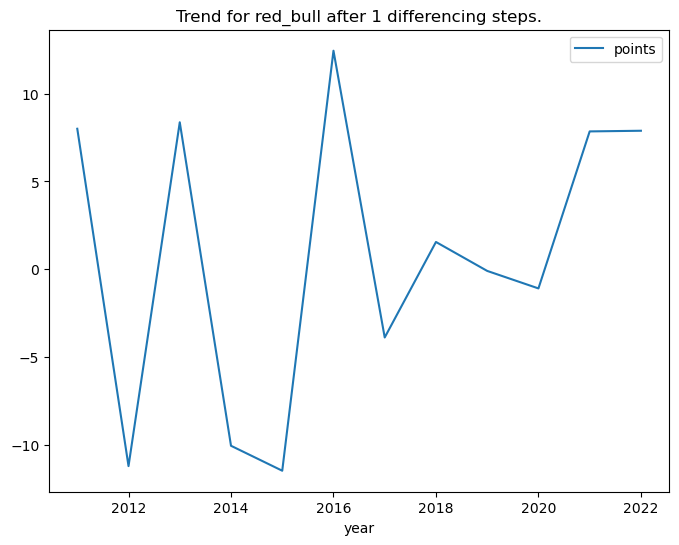

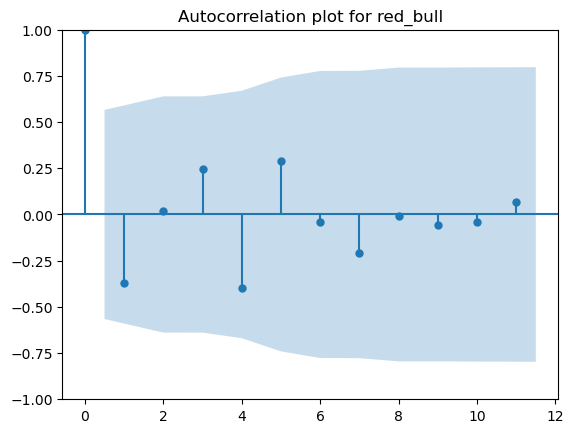

C:\Users\Fede\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



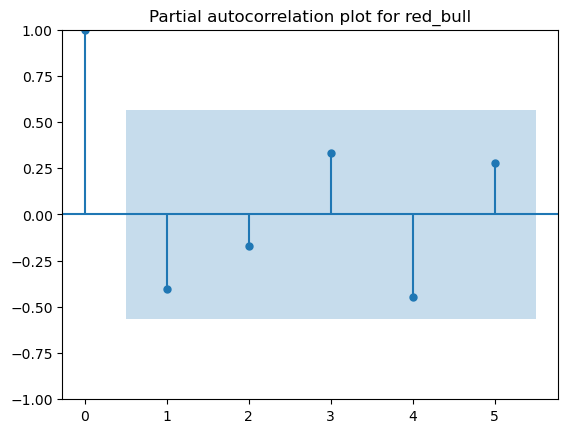

Sen's slope estimator: -0.27902141717931195
Mann-Kendall test p-value: 0.32809216383229467
williams: data is stationary after 1 differencing steps
ADF p-value of williams: 0.000000


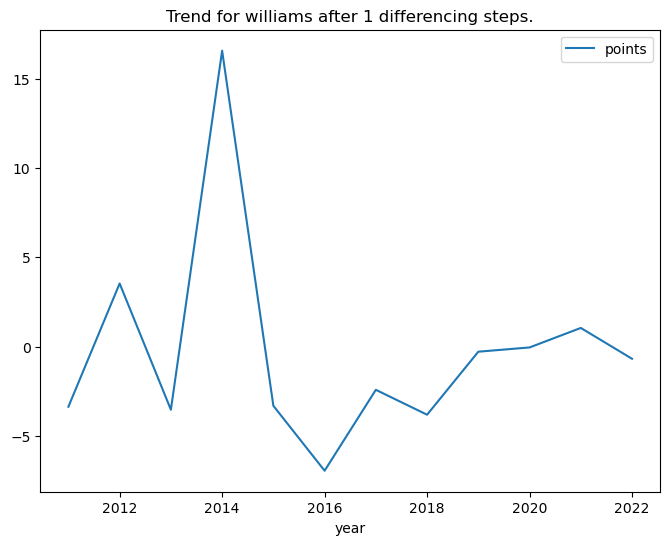

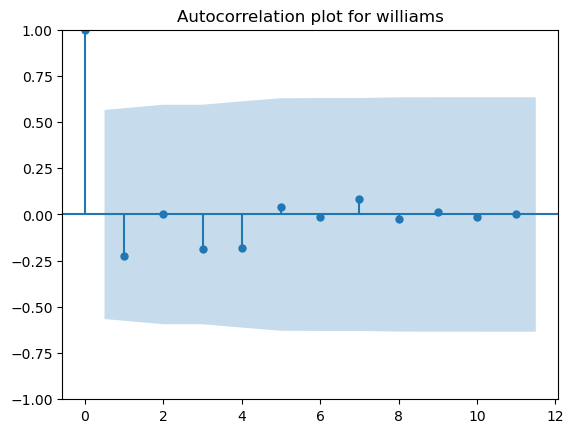

C:\Users\Fede\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



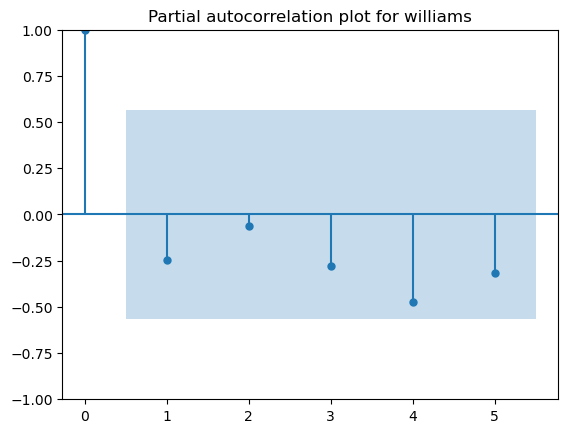

Sen's slope estimator: -0.2761904761904762
Mann-Kendall test p-value: 0.36752073824214304
haas: data is stationary after 3 differencing steps
ADF p-value of haas: 0.000000


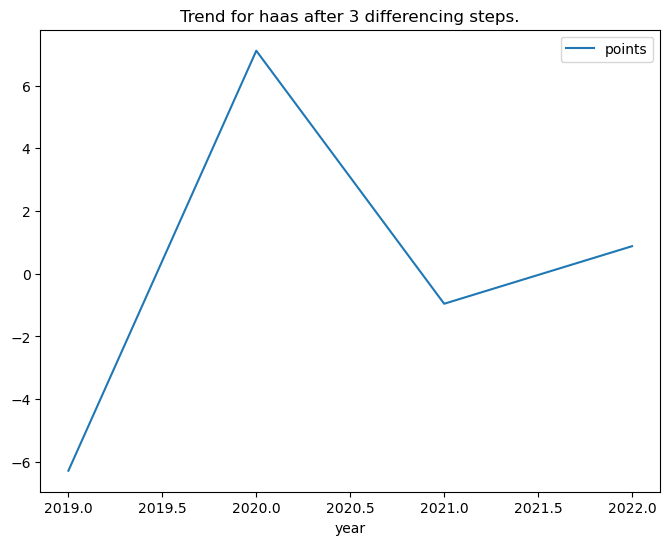

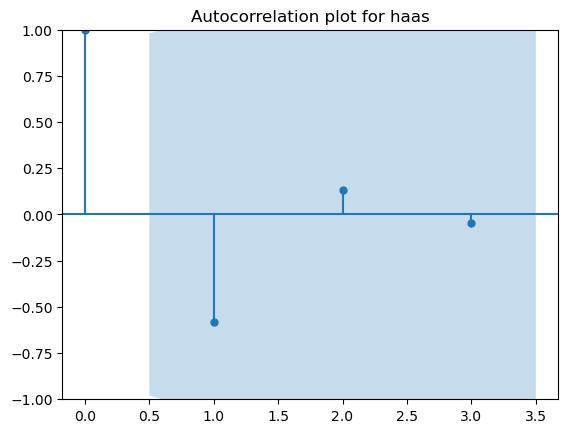

C:\Users\Fede\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



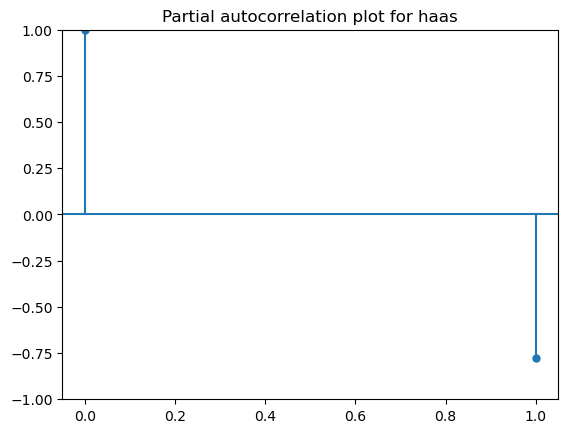

In [17]:

max_diffs = 4  # maximum number of differencing steps
for team in team_data.keys():
    slope = sen_slope(team_data[team]['points'].dropna())
    # Compute the p-value for the trend using the Mann-Kendall test
    mk_result = mk_test(team_data[team]['points'].dropna())
    pvalue = mk_result.p
    # Print the slope and p-value
    print('Sen\'s slope estimator:', slope)
    print('Mann-Kendall test p-value:', pvalue)
    
    # perform the ADF test
    result = adfuller(team_data[team]['points'])
    num_diffs = 0
    while result[1] > 0.05 and num_diffs < max_diffs:
        team_data[team]['points'] = team_data[team]['points'].diff()
        result = adfuller(team_data[team]['points'].dropna())
        num_diffs += 1
    if num_diffs == max_diffs:
        print(f"{team}: data is still non-stationary after {max_diffs} differencing steps")
        print(f'ADF p-value of {team}: %f' % result[1])
    else:
        print(f"{team}: data is stationary after {num_diffs} differencing steps")
        print(f'ADF p-value of {team}: %f' % result[1])
    
    team_data[team] = team_data[team].dropna(subset=['points'])   
    team_data[team] = team_data[team].reset_index(drop=True)
        
    max_lags_afc = (len(team_data[team]['points'].dropna())-1) # Maximum number of lags for this team
    max_lags_pafc = (len(team_data[team]['points'].dropna())/2)-1
    team_data[team].plot(x='year', y='points', figsize=(8,6))
    plt.title(f'Trend for {team} after {num_diffs} differencing steps.')
    plt.show()
    
    team_data[team].dropna(inplace=True)
    sm.graphics.tsa.plot_acf(team_data[team]['points'].dropna(), lags=max_lags_afc)
    plt.title(f'Autocorrelation plot for {team}')
    plt.show()
    
    team_data[team].dropna(inplace=True)
    sm.graphics.tsa.plot_pacf(team_data[team]['points'].dropna(), lags=max_lags_pafc)
    plt.title(f'Partial autocorrelation plot for {team}')
    plt.show()

# Q2

In [18]:
#Functions to invert the forecast of the models that have been differentiated previously
def inverted_forecast_second(x_pred,y_1,y_2):
    return x_pred + 2*y_1 - y_2

def inverted_forecast_first(x_pred,y_1):
    return x_pred + y_1

def inverted_forecast_third(x_pred,y_1,y_2,y_3):
    return x_pred + 3*y_1 - 3*y_2 +y_3

## Best Model for Alfa

In [19]:
model_1_alfa = ARIMA(team_data["alfa"]["points"], order=(1,0,0))
result_alfa = model_1_alfa.fit()
print(result_alfa.aic)
print(result_alfa.pvalues)
print(result_alfa.forecasts)

55.38792368682009
const     0.005243
ar.L1     0.736916
sigma2    0.007389
dtype: float64
[[1.92078904 1.99813657 1.99813657 2.77831001 2.13211615 1.5446672
  1.91568759 1.56331637 1.59362128 1.99224736 2.07616864 1.63681606
  1.66037684]]


In [20]:
model_2_alfa = ARIMA(team_data["alfa"]["points"], order=(2,0,0))
result = model_2_alfa.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

56.5358351240829
const     0.000882
ar.L1     0.718347
ar.L2     0.524132
sigma2    0.011693
dtype: float64
[[1.92111558 2.00197575 1.92575401 2.94029764 1.13226325 1.16987205
  2.38101532 1.46257927 1.93906553 2.41985211 2.03453244 1.35909985
  1.93470676]]


In [21]:
model_3_alfa = ARIMA(team_data["alfa"]["points"], order=(0,0,1))
result = model_3_alfa.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

53.77874128600944
const     0.025206
ma.L1     0.997542
sigma2    0.997539
dtype: float64
[[1.9953399  2.15556468 2.10215642 5.14372228 0.28036228 1.7617047
  2.10936743 0.23297709 2.01047137 2.24305846 2.42372819 0.20496216
  2.35159848]]


In [22]:
model_4_alfa = ARIMA(team_data["alfa"]["points"], order=(1,0,1))
result = model_4_alfa.fit()
print(result.aic)
print(result.pvalues)

54.315021506899654
const     0.012015
ar.L1     0.640860
ma.L1     0.999316
sigma2    0.999316
dtype: float64


In [23]:
model_5_alfa = ARIMA(team_data["alfa"]["points"], order=(2,0,2))
result = model_5_alfa.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

57.23033039159325
const     0.061107
ar.L1     0.821177
ar.L2     0.915882
ma.L1     1.000000
ma.L2     0.999999
sigma2    0.999999
dtype: float64
[[ 1.87269332  1.97223618  1.83603166  3.28590039 -0.15025956  1.39447462
   1.46962596  0.73323194  2.02952626  2.2130607   2.0826492   0.96888404
   2.50108985]]


We see that there is not big difference between these models. However, the model that performs the best is the AR(1)

## Best Model for Alpine

In [24]:
model_1_alpine = ARIMA(team_data["alpine"]["points"], order=(1,0,0))
result = model_1_alpine.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

83.54949728496764
const     0.000288
ar.L1     0.517986
sigma2    0.048117
dtype: float64
[[6.78556577 7.05190837 6.34842014 8.02780288 8.24002183 5.85597838
  6.38750282 5.83438985 6.20107844 6.6406097  6.42137448 7.35905225
  6.82416294]]


In [25]:
model_2_alpine = ARIMA(team_data["alpine"]["points"], order=(2,0,0))
result = model_2_alpine.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

85.38827162011671
const     0.000033
ar.L1     0.494571
ar.L2     0.730434
sigma2    0.052705
dtype: float64
[[6.78503119 7.05793059 6.10041499 8.50309744 7.54827897 4.69713823
  6.99579101 5.99107664 6.80001524 7.03685512 6.47575176 7.69376693
  6.42064358]]


In [26]:
model_3_alpine = ARIMA(team_data["alpine"]["points"], order=(0,0,1))
result_alpine = model_3_alpine.fit()
print(result_alpine.aic)
print(result_alpine.pvalues)
print(result_alpine.forecasts)

83.47194598715627
const     0.000193
ma.L1     0.445087
sigma2    0.043107
dtype: float64
[[6.80176936 7.12815344 6.17721139 8.5092498  8.33746348 5.31527589
  6.57149896 5.62368287 6.2739261  6.7133917  6.34883446 7.61973915
  6.69248064]]


In [27]:
model_4_alpine = ARIMA(team_data["alpine"]["points"], order=(0,0,2))
result = model_4_alpine.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

83.70354193794573
const     1.095397e-14
ma.L1     1.000000e+00
ma.L2     9.999904e-01
sigma2    9.999904e-01
dtype: float64
[[ 6.31215072  6.31215124  5.17875206  7.54717848 -0.33533683  0.29097679
   5.66591567  3.45143294 10.54011475  6.79328954 10.25429928  8.36211146
   5.97549785]]


In [28]:
model_5_alpine = ARIMA(team_data["alpine"]["points"], order=(1,0,1))
result = model_5_alpine.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

83.71836454853582
const     0.000058
ar.L1     0.303125
ma.L1     0.997794
sigma2    0.997791
dtype: float64
[[ 6.82135506  7.21296636  5.71633552 10.18381155  6.95306154  4.64158541
   7.84729876  3.63731112  8.30420653  5.08737401  7.50252183  7.62796471
   6.15221951]]


In [29]:
model_6_alpine = ARIMA(team_data["alpine"]["points"], order=(2,0,2))
result = model_6_alpine.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

86.24185001375734
const     0.000027
ar.L1     0.856353
ar.L2     0.722672
ma.L1     1.000000
ma.L2     0.999511
sigma2    0.999511
dtype: float64
[[6.50971544 6.69146421 5.46541592 8.7020289  3.3449444  2.57767712
  6.58062517 3.6308474  9.26450236 6.02555674 8.89641495 8.04385008
  6.26899749]]


We see that there is not big difference between these models. However, the model that performs the best is the MA(1).

## Best model for Ferrari

In [30]:
model_1_ferrari = ARIMA(team_data["ferrari"]["points"], order=(1,0,0))
result = model_1_ferrari.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

88.16366272265097
const     0.654430
ar.L1     0.054638
sigma2    0.115552
dtype: float64
[[ 0.96896715  0.78291494  2.18021419  4.16584997 -7.15962818  8.28187099
  -3.57346023  4.24149324  3.41420336  7.52351565 -9.42871553]]


In [31]:
model_2_ferrari = ARIMA(team_data["ferrari"]["points"], order=(2,0,0))
result = model_2_ferrari.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

89.74738804125394
const     0.784934
ar.L1     0.054293
ar.L2     0.679080
sigma2    0.088957
dtype: float64
[[ 0.66017104  0.31479721  1.87830687  5.20523123 -8.5183347   5.6460453
  -1.66960442  2.26839577  5.31238242 10.23545304 -9.70634917]]


In [32]:
model_3_ferrari = ARIMA(team_data["ferrari"]["points"], order=(0,0,1))
result = model_3_ferrari.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

84.83669261093083
const     0.758543
ma.L1     0.993900
sigma2    0.993884
dtype: float64
[[ 0.29507562 -0.24159695  1.22172986  5.63242224 -9.93582031  4.291746
  -5.21618176  1.03091557  5.01672872 16.60338057 -5.78618565]]


We see that there is not big difference between these models. However, the model that performs the best is the AR(1) (which is ARIMA(1,2,0) for the ferrari data without differencing).

In [33]:
# original data
ferrari_data = np.array([20.842105, 19.736842, 20.000000, 18.631579, 11.368421, 22.526316, 18.952381, 26.100000, 27.190476, 24.000000, 7.705882, 14.704545, 25.181818])
    
# forecasted differenced values
forecast_diff = np.array([ 0.96896715])

ferrari_forecast = []
last = ferrari_data[-1]
second_last = ferrari_data[-2]
for i in forecast_diff:
    value = inverted_forecast_second(i,last,second_last)
    ferrari_forecast.append(value)
    second_last = last
    last = value
    print(second_last)
    print(last)
    
print(ferrari_forecast)

25.181818
36.62805815
[36.62805815]


## Best model for Mclaren

In [34]:
model_1_mclaren = ARIMA(team_data["mclaren"]["points"], order=(1,0,0))
result = model_1_mclaren.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

80.3711549768951
const     0.512310
ar.L1     0.937999
sigma2    0.278467
dtype: float64
[[-1.38859771 -1.50454071 -1.20224791 -1.03647983 -1.5312775  -1.17534402
  -1.50247179 -1.36540597 -1.47879859 -1.55817343 -1.59072378 -1.45229585]]


In [35]:
model_2_mclaren = ARIMA(team_data["mclaren"]["points"], order=(2,0,0))
result = model_2_mclaren.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

82.20728090558957
const     0.518120
ar.L1     0.923550
ar.L2     0.751856
sigma2    0.256753
dtype: float64
[[-1.43060376 -1.58620504 -0.77723425 -1.70954247 -2.90596905 -0.64614953
  -2.35491433 -0.97581176 -1.61911993 -1.28951718 -1.03187477 -0.74866512]]


In [36]:
model_3_mclaren = ARIMA(team_data["mclaren"]["points"], order=(0,0,1))
result = model_3_mclaren.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

80.37340577883637
const     0.512270
ma.L1     0.949243
sigma2    0.273439
dtype: float64
[[-1.38820135 -1.48250877 -1.23893492 -1.09770003 -1.49682813 -1.21740446
  -1.47647332 -1.37159383 -1.46118778 -1.52811657 -1.55634321 -1.44438874]]


In [37]:
model_4_mclaren = ARIMA(team_data["mclaren"]["points"], order=(0,0,2))
result = model_4_mclaren.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

82.1095844300412
const     0.504272
ma.L1     0.884569
ma.L2     0.652329
sigma2    0.188230
dtype: float64
[[-1.47828216 -1.69872197 -0.50225512 -1.91588875 -4.09688057 -0.28197069
  -2.39729423 -1.00255433 -1.54911248 -1.27515482 -0.71168934 -0.31093815]]


C:\Users\Fede\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



We see that there is not big difference between these models. However, the model that performs the best is the AR(1) (which is ARIMA(1,1,0) for the mclaren data without differencing).

In [38]:
# original data
mclaren_data = np.array([23.894737, 26.157895, 18.900000, 6.421053, 9.526316, 1.421053, 3.619048, 1.500000, 2.952381, 6.904762, 11.882353, 12.500000, 7.227273])
  
# forecasted differenced values
forecast_diff = np.array([-1.38859771])

mclaren_forecast = []
last = mclaren_data[-1]
for i in forecast_diff:
    value = inverted_forecast_first(i,last)
    mclaren_forecast.append(value)
    last = value
    
print(mclaren_forecast)

[5.83867529]


## Best model for Williams

In [39]:
model_1_williams = ARIMA(team_data["williams"]["points"], order=(1,0,0))
result = model_1_williams.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

81.28926776951442
const     0.952619
ar.L1     0.865189
sigma2    0.015103
dtype: float64
[[-0.21929615  0.45419445 -1.02260625  0.49021398 -3.81186856  0.44293835
   1.22121747  0.251665    0.55005893 -0.20509158 -0.25601204 -0.48978327]]


In [40]:
model_2_williams = ARIMA(team_data["williams"]["points"], order=(2,0,0))
result = model_2_williams.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

83.26744399130727
const     0.952215
ar.L1     0.855499
ar.L2     0.896999
sigma2    0.028643
dtype: float64
[[-0.22320198  0.4497814  -0.93309071  0.36244584 -3.8297461  -0.21414228
   1.4004758   0.53837833  0.66567257 -0.06397827 -0.25976291 -0.51273339]]


In [41]:
model_3_williams = ARIMA(team_data["williams"]["points"], order=(0,0,1))
result = model_3_williams.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

81.17589904801056
const     0.912867
ma.L1     0.644230
sigma2    0.042214
dtype: float64
[[-0.22247851  0.59096538 -1.03876698  0.47329802 -4.71009261 -0.6109936
   1.54521769  0.88280907  1.08700862  0.16002437 -0.16461963 -0.55966007]]


In [42]:
model_4_williams = ARIMA(team_data["williams"]["points"], order=(0,0,2))
result = model_4_williams.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

81.93109153275857
const     0.856096
ma.L1     0.998652
ma.L2     0.997813
sigma2    0.997807
dtype: float64
[[-0.41563466  0.3156799  -0.73493352 -0.1691472  -6.84328056 -7.32474595
  -1.74624834 -0.20297222  1.6577263   1.84132445  1.25993352  0.36372728]]


In [43]:
model_5_williams = ARIMA(team_data["williams"]["points"], order=(1,0,1))
result = model_5_williams.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

81.43756220473766
const     0.878613
ar.L1     0.587142
ma.L1     0.998175
sigma2    0.998173
dtype: float64
[[-0.3630067   0.42330554 -0.97167215  0.24849396 -6.22288093 -4.30614733
  -1.15709164 -0.20871696  1.26507217  1.09345097  0.83942743  0.11733609]]


We see that there is not big difference between these models. However, the model that performs the best is the MA(1) (which is ARIMA(0,1,1) for the williams data without differencing).

In [44]:
# original data
williams_data = np.array([3.631579, 0.263158, 3.800000, 0.263158, 16.842105, 13.526316, 6.571429, 4.150000, 0.333333, 0.047619, 0.000000, 1.045455, 0.363636])
 
# forecasted differenced values
forecast_diff = np.array([-0.22247851])

williams_forecast = []
last = williams_data[-1]
for i in forecast_diff:
    value = inverted_forecast_first(i,last)
    williams_forecast.append(value)
    last = value
    
print(williams_forecast)

[0.14115749000000002]


## Best model for Red Bull

In [45]:
model_1_redbull = ARIMA(team_data["red_bull"]["points"], order=(1,0,0))
result = model_1_redbull.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

88.25472610279094
const     0.853838
ar.L1     0.243777
sigma2    0.155416
dtype: float64
[[ 0.32700225 -2.75545565  4.96195031 -2.90346069  4.49679159  5.0676682
  -4.54057773  2.01936836 -0.16526666  0.49662801  0.8972307  -2.69476679]]


In [46]:
model_2_redbull = ARIMA(team_data["red_bull"]["points"], order=(2,0,0))
result = model_2_redbull.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

89.81986193504639
const     0.898969
ar.L1     0.351438
ar.L2     0.657677
sigma2    0.232753
dtype: float64
[[ 0.18898061 -3.0112242   4.16344174 -1.37863996  3.50227879  8.29563987
  -3.35993428 -0.48729887  0.409564    0.02909913  0.89330674 -3.36082068]]


In [47]:
model_3_redbull = ARIMA(team_data["red_bull"]["points"], order=(0,0,1))
result = model_3_redbull.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

88.10912387407893
const     0.908841
ma.L1     0.305476
sigma2    0.163350
dtype: float64
[[ 0.16131779 -2.77358713  3.83524836 -1.86659415  3.8429215   7.05725663
  -2.26428882  0.89151774 -0.13630096  0.14282515  0.71761743 -3.05026553]]


In [48]:
model_4_redbull = ARIMA(team_data["red_bull"]["points"], order=(0,0,2))
result = model_4_redbull.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

90.07927986975038
const     0.964373
ma.L1     0.999191
ma.L2     0.998806
sigma2    0.998804
dtype: float64
[[-0.04850015 -2.41098355  1.69977852 -1.09770649  2.70396966  9.7306647
   2.34717298  2.6803685   2.37096088  1.71236558  2.32700928 -2.52010427]]


In [49]:
model_5_redbull = ARIMA(team_data["red_bull"]["points"], order=(1,0,1))
result = model_5_redbull.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

90.04257832237344
const     0.897115
ar.L1     0.897552
ma.L1     0.844505
sigma2    0.212470
dtype: float64
[[ 0.20710474 -3.03477676  4.60167011 -2.36584897  4.28366295  6.84390087
  -3.63888948  1.03034486 -0.18906535  0.23600199  0.82453855 -3.19939942]]


We see that there is not big difference between these models. However, the model that performs the best is the MA(1) (which is ARIMA(0,1,1) for the red bull data without differencing).

In [50]:
# original data
redbull_data = np.array([26.210526, 34.210526, 23.000000, 31.368421, 21.315789, 9.842105, 22.285714, 18.400000, 19.952381, 19.857143, 18.764706, 26.613636, 34.500000])
  
# forecasted differenced values
forecast_diff = np.array([-0.22247851])

redbull_forecast = []
last = redbull_data[-1]
for i in forecast_diff:
    value = inverted_forecast_first(i,last)
    redbull_forecast.append(value)
    last = value
    
print(redbull_forecast)

[34.27752149]


## Best model for Alpha Tauri

In [51]:
model_1_alphatauri = ARIMA(team_data["alpha_tauri"]["points"], order=(1,0,0))
result = model_1_alphatauri.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

55.30554220347328
const     0.462260
ar.L1     0.909195
sigma2    0.068607
dtype: float64
[[-0.53204073 -0.38176681 -0.68458933 -0.52680517 -0.7522739  -0.36990003
  -0.59119341 -0.51562906 -0.8733171  -0.55728896 -0.40226844]]


In [52]:
model_2_alphatauri = ARIMA(team_data["alpha_tauri"]["points"], order=(2,0,0))
result = model_2_alphatauri.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

57.2860685118208
const     0.564818
ar.L1     0.925454
ar.L2     0.941191
sigma2    0.073867
dtype: float64
[[-0.56782832 -0.44230115 -0.79086493 -0.46270912 -0.74901405 -0.29144345
  -0.72356344 -0.51574748 -0.85387705 -0.36189242 -0.44701221]]


In [53]:
model_3_alphatauri = ARIMA(team_data["alpha_tauri"]["points"], order=(0,0,1))
result = model_3_alphatauri.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

55.301562834491804
const     0.433514
ma.L1     0.883863
sigma2    0.063642
dtype: float64
[[-0.5157156  -0.32603478 -0.6868853  -0.52544859 -0.79357928 -0.33825787
  -0.57006642 -0.49897383 -0.94388335 -0.59115065 -0.35781764]]


We see that there is not big difference between these models. However, the model that performs the best is the MA(1) (which is ARIMA(0,2,1) for the alpha tauri data without differencing).

In [54]:
# original data
alphatauri_data = np.array([0.684211, 2.157895, 1.300000, 1.736842, 1.578947, 3.526316, 3.000000, 2.650000, 1.571429, 4.047619, 6.294118, 6.454545, 1.590909]) 
 
# forecasted differenced values
forecast_diff = np.array([-0.5157156])

alphatauri_forecast = []
last = alphatauri_data[-1]
second_last = alphatauri_data[-2]
for i in forecast_diff:
    value = inverted_forecast_second(i,last,second_last)
    alphatauri_forecast.append(value)
    second_last = last
    last = value
    print(second_last)
    print(last)
    
print(alphatauri_forecast)

1.590909
-3.7884426000000007
[-3.7884426000000007]


## Best model for Aston Martin

In [55]:
model_1_aston = ARIMA(team_data["aston_martin"]["points"], order=(1,0,0))
result = model_1_aston.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

71.26650427179436
const     0.930402
ar.L1     0.040954
sigma2    0.031075
dtype: float64
[[-0.06940006 -0.12246164 -0.89025916  0.50802485 -1.88461989  0.3352418
  -0.56926738 -0.58305297  1.66764921  0.68723754 -3.95934985  3.7498441 ]]


In [56]:
model_2_aston = ARIMA(team_data["aston_martin"]["points"], order=(2,0,0))
result = model_2_aston.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

67.7354754262093
const     0.634874
ar.L1     0.000029
ar.L2     0.002500
sigma2    0.101560
dtype: float64
[[ 0.15024857  0.19722345 -1.1790188   0.20546987 -2.01849122 -1.83608967
   0.22746855 -1.35244077  2.97465355  4.94444743 -5.7213404   1.201767  ]]


In [57]:
model_3_aston = ARIMA(team_data["aston_martin"]["points"], order=(0,0,1))
result = model_3_aston.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

68.31687476635568
const     0.800604
ma.L1     0.993964
sigma2    0.993956
dtype: float64
[[ 0.08343506  0.0988368  -1.06295404  0.33424572 -2.93337697 -1.52771116
  -2.15191574 -2.77240486  1.23177222  2.82059782 -5.42215031  3.22832158]]


In [58]:
model_4_aston = ARIMA(team_data["aston_martin"]["points"], order=(0,0,2))
result = model_4_aston.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

70.31386812894692
const     0.900853
ma.L1     0.996304
ma.L2     0.995884
sigma2    0.996379
dtype: float64
[[ 0.08533806  0.10204569 -1.08853403  0.34808803 -3.00190511 -1.5582793
  -2.19531442 -2.82934643  1.27381505  2.90295361 -5.53698696  3.31770207]]


C:\Users\Fede\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



We see that there is not big difference between these models. However, the model that performs the best is the AR(2) (which is ARIMA(2,1,0) for the alpha tauri data without differencing).

In [59]:
# original data
astonmartin_data = np.array([3.578947, 3.631579, 5.450000, 4.052632, 8.157895, 7.157895, 8.238095, 9.350000, 5.285714, 3.476190, 12.352941, 3.500000, 2.500000])

# forecasted differenced values
forecast_diff = np.array([0.15024857])

astonmartin_forecast = []
last = astonmartin_data[-1]
for i in forecast_diff:
    value = inverted_forecast_first(i,last)
    astonmartin_forecast.append(value)
    last = value
    
print(astonmartin_forecast)

[2.65024857]


## Best model for Mercedes

In [60]:
model_1_mercedes = ARIMA(team_data["mercedes"]["points"], order=(1,0,0))
result = model_1_mercedes.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

81.79061390467437
const     0.959918
ar.L1     0.977516
sigma2    0.032143
dtype: float64
[[-0.17550862 -0.19866533 -0.44476445 -0.29968782  0.17407641 -0.16559125
  -0.13035984 -0.19518881 -0.30185507 -0.07045292 -0.09320246]]


In [61]:
model_2_mercedes = ARIMA(team_data["mercedes"]["points"], order=(2,0,0))
result = model_2_mercedes.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

81.41290953165905
const     0.794828
ar.L1     0.933058
ar.L2     0.034676
sigma2    0.071572
dtype: float64
[[-0.57459588 -0.6177373  -1.89594318 -7.55617755 -3.07020729  7.70221013
  -0.44913757  0.27064326 -1.51811975 -3.62514222  1.93062181]]


In [62]:
model_3_mercedes = ARIMA(team_data["mercedes"]["points"], order=(0,0,1))
result = model_3_mercedes.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

80.57966383250408
const     0.548337
ma.L1     0.994218
sigma2    0.994188
dtype: float64
[[ -0.80917699  -1.71113328 -10.90430672 -13.56238625   2.61459105
    1.93355163   2.95426404   1.05913086  -5.38728594  -0.72160027
    2.4756475 ]]


In [63]:
model_1_mercedes = ARIMA(team_data["mercedes"]["points"], order=(1,0,1))
result = model_1_mercedes.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

81.29192595206544
const     0.688292
ar.L1     0.560103
ma.L1     0.997782
sigma2    0.997778
dtype: float64
[[-0.65203051 -1.16644026 -6.4905247  -8.28819838  0.91068241  0.70565908
   1.44775573  0.46036898 -3.26281898 -0.44202107  1.5398109 ]]


We see that there is not big difference between these models. However, the model that performs the best is the AR(2) (which is ARIMA(2,2,0) for the mercedes data without differencing).

In [64]:
# original data
mercedes_data = np.array([11.263158, 8.684211, 7.100000, 18.947368, 36.894737, 37.000000, 36.428571, 33.400000, 31.190476, 35.190476, 33.705882, 27.886364, 23.409091])

# forecasted differenced values
forecast_diff = np.array([-0.57459588])

forecast_mercedes = []
last = mercedes_data[-1]
second_last = mercedes_data[-2]
for i in forecast_diff:
    value = inverted_forecast_second(i,last,second_last)
    forecast_mercedes.append(value)
    second_last = last
    last = value
    print(second_last)
    print(last)
    
print(forecast_mercedes)

23.409091
18.357222120000003
[18.357222120000003]


## Best model for Haas

In [65]:
model_1_haas = ARIMA(team_data["haas"]["points"], order=(1,0,0))
result = model_1_haas.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

26.470015695872714
const     0.588211
ar.L1     0.081099
sigma2    0.612192
dtype: float64
[[ 1.04857944  7.27542647 -4.10111949  2.752713  ]]


In [66]:
model_1_haas = ARIMA(team_data["haas"]["points"], order=(1,0,1))
result = model_1_haas.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

26.320056038090282
const     0.959469
ar.L1     0.950258
ma.L1     0.999872
sigma2    0.999871
dtype: float64
[[ 1.26103025  8.16088218 -3.04265579  1.69014021]]


We see that there is not big difference between these models. However, the model that performs the best is the AR(1) (which is ARIMA(1,3,0) for the haas without differencing).

In [67]:
def inverted_forecast_third(x_pred,y_1,y_2,y_3):
    return x_pred + 3*y_1 - 3*y_2 +y_3

In [68]:
# original data
haas_data = np.array([1.380952, 2.350000, 4.428571, 1.333333, 0.176471, 0.000000, 1.681818])

# forecasted differenced values
forecast_diff = np.array([1.04857944])

forecast_haas = []
last = haas_data[-1]
second_last = haas_data[-2]
third_last = haas_data[-3]
for i in forecast_diff:
    value = inverted_forecast_third(i,last,second_last,third_last)
    forecast_haas.append(value)
    third_last = second_last
    second_last = last
    last = value
    print(third_last)
    print(second_last)
    print(last)
    
print(forecast_haas)

0.0
1.681818
6.270504440000001
[6.270504440000001]


In [69]:
print(f" Average points of Ferrari for the next season is {ferrari_forecast}")
print(f" Average points of Red Bull for the next season is {redbull_forecast}")
print(f" Average points of Mercedes for the next season is {forecast_mercedes}")
print(f" Average points of Alpine for the next season is {result_alpine.forecasts[0][0]}")
print(f" Average points of Haas for the next season is {forecast_haas}")
print(f" Average points of Mclaren for the next season is {mclaren_forecast}")
print(f" Average points of Aston Martin for the next season is {astonmartin_forecast}")
print(f" Average points of Alfa Romeo for the next season is {result_alfa.forecasts[0][0]}")
print(f" Average points of Williams for the next season is {williams_forecast}")
print(
    f" Average points of Alpha Tauri for the next season is {alphatauri_forecast}.",
    "This is negative because of when performing inverted differencing,", 
    "the second last value is much greater than the last value. Therefore, to simplify it, it will make on average 0 points",
    "per race")

 Average points of Ferrari for the next season is [36.62805815]
 Average points of Red Bull for the next season is [34.27752149]
 Average points of Mercedes for the next season is [18.357222120000003]
 Average points of Alpine for the next season is 6.801769361707239
 Average points of Haas for the next season is [6.270504440000001]
 Average points of Mclaren for the next season is [5.83867529]
 Average points of Aston Martin for the next season is [2.65024857]
 Average points of Alfa Romeo for the next season is 1.9207890373872318
 Average points of Williams for the next season is [0.14115749000000002]
 Average points of Alpha Tauri for the next season is [-3.7884426000000007]. This is negative because of when performing inverted differencing, the second last value is much greater than the last value. Therefore, to simplify it, it will make on average 0 points per race


Analaysing these results, it is concluded that the winner for the 2023 season will be Ferrari, being Red Bull in second place and Mercedes in third.

# Q3

In [70]:
# Filter the 'races' dataset to only include years between 2003 and 2009
filtered_races = races[(races['year'] >= 2003) & (races['year'] <= 2009)]

# Merge the 'filtered_races' dataset with the 'results' dataset on 'raceId'
merged_df = pd.merge(filtered_races, results, on='raceId')

# Merge the 'merged_df' dataframe with the 'constructors' dataset on 'constructorId'
merged_df = pd.merge(merged_df, constructors, on='constructorId')

# Update the points system
points_mapping = {1: 25, 2: 18, 3: 15, 4: 12, 5: 10, 6: 8, 7: 6, 8: 4, 9: 2, 10: 1}
merged_df['points'] = merged_df['positionOrder'].map(points_mapping).fillna(0)

# Keep only the required columns
final_df = merged_df[['raceId', 'year', 'round', 'circuitId', 'name_x', 'date', 'points', 'constructorRef', 'nationality']]


In [71]:
# To use average because the number of races was lower on previous years
season_points = final_df[(final_df['year'] >= 2003) & (final_df['year'] <= 2009)].groupby(['year','constructorRef'])['points'].mean()
season_points = season_points.reset_index()
season_points["constructorRef"].unique()
#len(season_points["constructorRef"].unique())

array(['bar', 'ferrari', 'jaguar', 'jordan', 'mclaren', 'minardi',
       'renault', 'sauber', 'toyota', 'williams', 'red_bull',
       'bmw_sauber', 'honda', 'mf1', 'spyker_mf1', 'super_aguri',
       'toro_rosso', 'spyker', 'force_india', 'brawn'], dtype=object)

In [72]:
# Count the number of occurrences of each constructorRef
counts = season_points['constructorRef'].value_counts()
counts
# Get the constructorRef values that appear in more than 4 years
mask = counts[counts > 4].index
## Subset the results_of_teams dataframe based on the mask
subset = season_points[season_points['constructorRef'].isin(mask)]

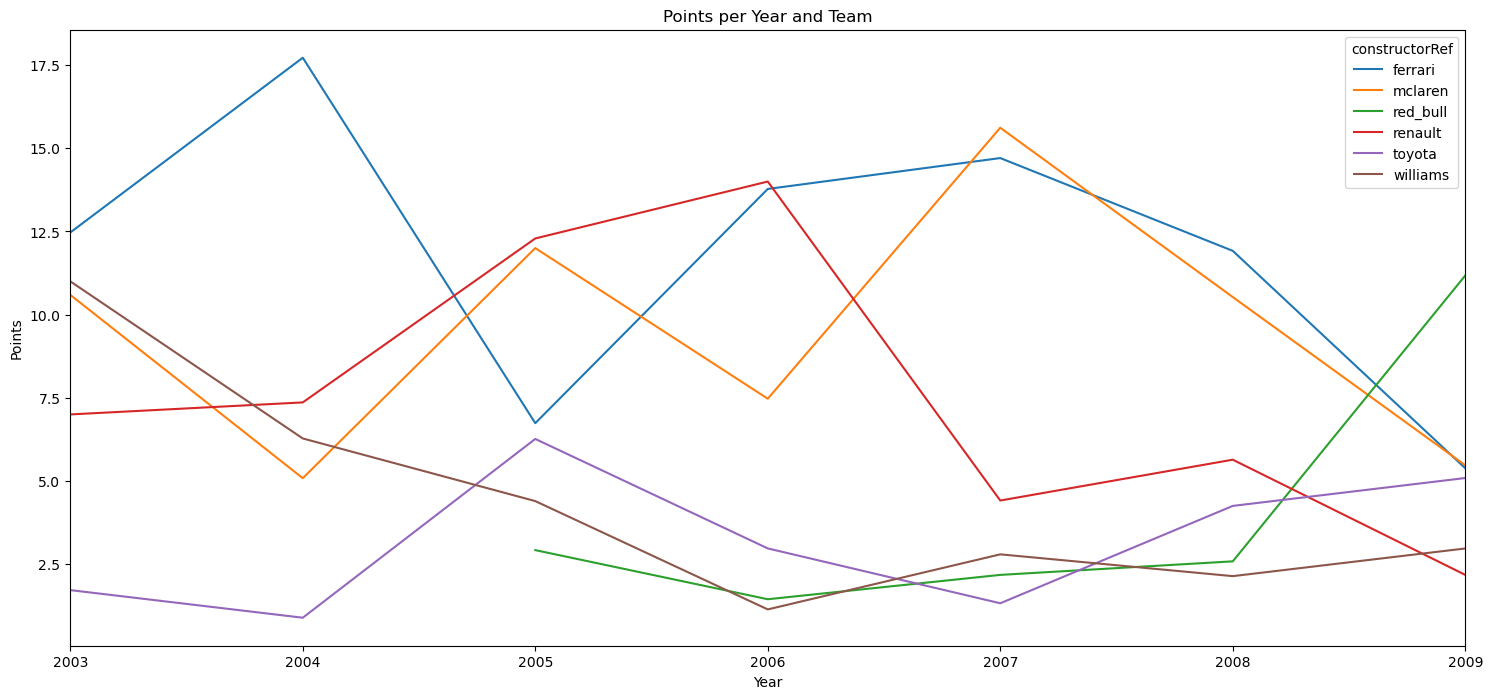

In [73]:
import matplotlib.pyplot as plt

# Create a pivot table with the points as values
pivot_table = pd.pivot_table(subset, values='points', index='year', columns='constructorRef')

# Plot the pivot table as a line plot
pivot_table.plot(kind='line', figsize=(18,8))
plt.xlabel('Year')
plt.xlim(2003,2009)
plt.ylabel('Points')
plt.title('Points per Year and Team')
plt.show()

In [74]:
team_data = {}
for team in subset['constructorRef'].unique():
    team_data[team] = subset[subset['constructorRef'] == team].reset_index(drop=True)
team_data

{'ferrari':    year constructorRef     points
 0  2003        ferrari  12.468750
 1  2004        ferrari  17.722222
 2  2005        ferrari   6.736842
 3  2006        ferrari  13.777778
 4  2007        ferrari  14.705882
 5  2008        ferrari  11.916667
 6  2009        ferrari   5.382353,
 'mclaren':    year constructorRef     points
 0  2003        mclaren  10.593750
 1  2004        mclaren   5.083333
 2  2005        mclaren  12.000000
 3  2006        mclaren   7.472222
 4  2007        mclaren  15.617647
 5  2008        mclaren  10.527778
 6  2009        mclaren   5.470588,
 'renault':    year constructorRef     points
 0  2003        renault   7.000000
 1  2004        renault   7.361111
 2  2005        renault  12.289474
 3  2006        renault  14.000000
 4  2007        renault   4.411765
 5  2008        renault   5.638889
 6  2009        renault   2.176471,
 'toyota':    year constructorRef    points
 0  2003         toyota  1.718750
 1  2004         toyota  0.888889
 2  2005    

Sen's slope estimator: 0.5615808823529411
Mann-Kendall test p-value: 0.36752073824214304
toyota: data is stationary after 0 differencing steps
ADF p-value of toyota: 0.000000


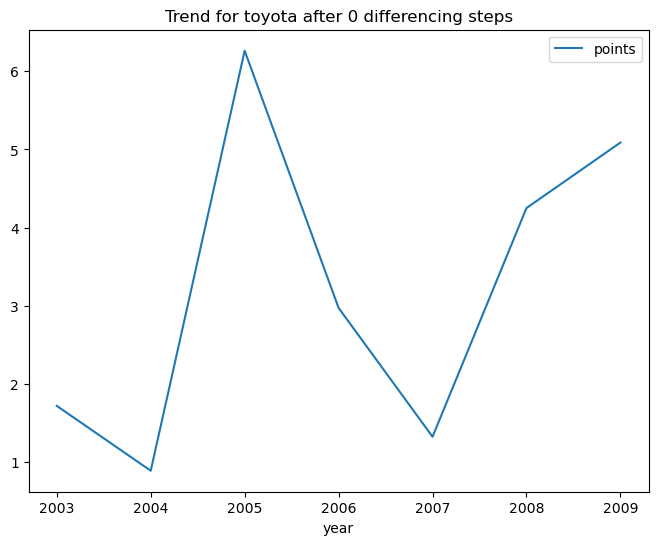

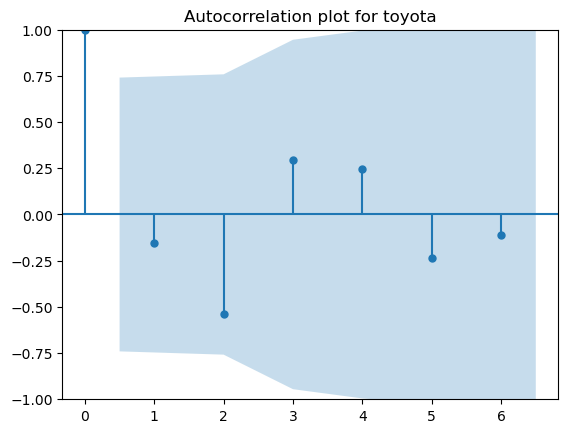

C:\Users\Fede\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



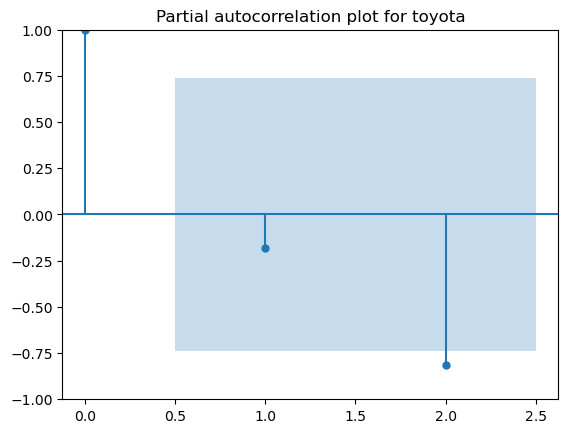

In [75]:
max_diffs = 4  # maximum number of differencing steps
for team in team_data.keys():
    if team == "toyota":
        slope = sen_slope(team_data[team]['points'].dropna())
        # Compute the p-value for the trend using the Mann-Kendall test
        mk_result = mk_test(team_data[team]['points'].dropna())
        pvalue = mk_result.p
        # Print the slope and p-value
        print('Sen\'s slope estimator:', slope)
        print('Mann-Kendall test p-value:', pvalue)
        
        # perform the ADF test
        result = adfuller(team_data[team]['points'])
        num_diffs = 0
        while result[1] > 0.05 and num_diffs < max_diffs:
            team_data[team]['points'] = team_data[team]['points'].diff()
            result = adfuller(team_data[team]['points'].dropna())
            num_diffs += 1
        if num_diffs == max_diffs:
            print(f"{team}: data is still non-stationary after {max_diffs} differencing steps")
            print(f'ADF p-value of {team}: %f' % result[1])
        else:
            print(f"{team}: data is stationary after {num_diffs} differencing steps")
            print(f'ADF p-value of {team}: %f' % result[1])
        
        team_data[team] = team_data[team].dropna(subset=['points'])   
        team_data[team] = team_data[team].reset_index(drop=True)
            
        max_lags_afc = (len(team_data[team]['points'].dropna())-1) # Maximum number of lags for this team
        max_lags_pafc = (len(team_data[team]['points'].dropna())/2)-1
        team_data[team].plot(x='year', y='points', figsize=(8,6))
        plt.title(f'Trend for {team} after {num_diffs} differencing steps')
        plt.show()
        
        team_data[team].dropna(inplace=True)
        sm.graphics.tsa.plot_acf(team_data[team]['points'].dropna(), lags=max_lags_afc)
        plt.title(f'Autocorrelation plot for {team}')
        plt.show()
        
        team_data[team].dropna(inplace=True)
        sm.graphics.tsa.plot_pacf(team_data[team]['points'].dropna(), lags=max_lags_pafc)
        plt.title(f'Partial autocorrelation plot for {team}')
        plt.show()

## Best model for Toyota

In [76]:
model_1_toyota = ARIMA(team_data["toyota"]["points"], order=(1,0,0))
result = model_1_toyota.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

34.63194067593618
const     0.000046
ar.L1     0.770912
sigma2    0.339766
dtype: float64
[[3.20679228 3.45998904 3.60119346 2.68673859 3.24670538 3.52723752
  3.02928602]]


In [77]:
model_1_toyota = ARIMA(team_data["toyota"]["points"], order=(2,0,0))
result = model_1_toyota.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

25.673272090787552
const     1.076683e-155
ar.L1      9.771761e-04
ar.L2      2.102614e-24
sigma2     5.257008e-01
dtype: float64
[[3.26253486 3.77898313 6.28327964 3.56342225 0.59421856 4.80552302
  4.46436376]]


In [78]:
# To obtain the 95% CI
forecasts = np.array([[3.26253486, 3.77898313, 6.28327964, 3.56342225]])
sigma = np.sqrt(result.params["sigma2"])

lower_bound = forecasts - 1.96 * sigma
upper_bound = forecasts + 1.96 * sigma

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: [[2.07918967 2.59563794 5.09993445 2.38007706]]
Upper Bound: [[4.44588005 4.96232832 7.46662483 4.74676744]]


In [79]:
model_1_toyota = ARIMA(team_data["toyota"]["points"], order=(0,0,1))
result = model_1_toyota.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

32.15417840678922
const     8.337312e-19
ma.L1     9.997886e-01
sigma2    9.997886e-01
dtype: float64
[[3.22227451 3.97403677 5.27903975 2.48418591 2.83184547 4.47920454
  3.41873554]]


In [80]:
model_1_toyota = ARIMA(team_data["toyota"]["points"], order=(0,0,2))
result = model_1_toyota.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

33.54818686209086
const     5.207278e-09
ma.L1     9.999131e-01
ma.L2     9.997290e-01
sigma2    9.997289e-01
dtype: float64
[[3.27162138 3.37367342 4.18123308 4.07823987 2.31649865 4.05195791
  3.81146253]]


C:\Users\Fede\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [81]:
model_1_toyota = ARIMA(team_data["toyota"]["points"], order=(1,0,1))
result = model_1_toyota.fit()
print(result.aic)
print(result.pvalues)
print(result.forecasts)

36.35565874534204
const     0.001084
ar.L1     0.586870
ma.L1     0.998587
sigma2    0.998584
dtype: float64
[[3.29710207 3.0422214  3.07358584 4.08923938 2.52155217 3.55278535
  3.28688386]]


We see that there is not big difference between these models. However, the model that performs the best is the AR(2).